# Introduction

The healthcare industry is a complex and vital sector, where understanding patterns in healthcare expenditures can provide valuable insights for healthcare providers, insurers, and policymakers. This project aims to analyze public Medicare claims data to identify trends, patterns, and disparities in healthcare expenditures across different demographics and diagnosis-related groups (DRGs). By leveraging the 2008 Medicare Inpatient Claims Public Use File (PUF), we will explore the distribution of healthcare costs within a limited set of DRGs that have a significant number of claims and low suppression rates, as per the dataset's limitations.

Our analysis will primarily focus on understanding the variations in healthcare expenditures across factors such as age, gender, region, and DRGs. We will also investigate the relationships between healthcare expenditures and other relevant variables, such as length of stay. To communicate our findings effectively, we will employ various data visualization techniques using Python libraries such as Matplotlib and Seaborn.

It is important to note that the dataset we will be using has certain limitations due to data suppression, which aims to protect beneficiary confidentiality. As a result, our analysis will be restricted to the DRGs with a significant number of claims in the PUF and a small rate of suppression. This constraint should be taken into account when interpreting the results of our analysis.

In the following sections, we will detail the steps taken in data preparation, exploratory data analysis, data visualization, and interpretation of our findings. The insights generated from this project have the potential to inform healthcare decision-making and contribute to more efficient, equitable, and cost-effective healthcare systems.

# Data Preparation

## Load the dataset and necessary Python libraries 

In [5]:
# Load necessary libaries
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt

# Filepaths
data_filepath = '/home/kevin/portfolio.git/datasets/2008_BSA_Inpatient_Claims_PUF.csv'
base_drg_filepath = '/home/kevin/portfolio.git/datasets/Base_DRG_Descriptors.csv'
icd9_filepath = '/home/kevin/portfolio.git/datasets/ICD9_Descriptors.csv'

# Load csv's
data = pd.read_csv(data_filepath)
base_drg_df = pd.read_csv(base_drg_filepath)
icd9_df = pd.read_csv(icd9_filepath)

# Join the datasets and rename columns
data = pd.merge(data, base_drg_df[['Base DRG', 'Descriptor']], 
                left_on='IP_CLM_BASE_DRG_CD', right_on='Base DRG', 
                how='left', suffixes=('_base', '_drg'))

data = data.drop(['Base DRG'], axis=1)
data = data.rename(columns={'Descriptor': 'descriptor_drg'})

data = pd.merge(data, icd9_df[['ICD-9 Procedure Code', 'Descriptor']], 
                left_on='IP_CLM_ICD9_PRCDR_CD', right_on='ICD-9 Procedure Code', 
                how='left', suffixes=('_icd9', '_proc'))

data = data.drop(['ICD-9 Procedure Code'], axis=1)
data = data.rename(columns={'Descriptor': 'descriptor_icd'})

# Replace missing values in 'descriptor_icd' column with 'No primary procedure on patient'
data['descriptor_icd'] = data['descriptor_icd'].fillna('No primary procedure on patient')

## Inspect the dataset for missing values, outliers, or inconsistencies

In this section, we will examine key variables in the dataset to identify any outliers or inconsistencies that may impact the accuracy of our analysis. We will visually inspect each variable using appropriate graphs and validate their values based on the expected categories or ranges.  Some variables are transformed or renamed for clarity or ease of use.

ID Variable (IP_CLM_ID): We will remove the index since it is not necessary for our aggregate analysis and will not be used in any data merging or tracking operations.

Gender Variable (BENE_SEX_IDENT_CD): Next, we will verify that the gender variable contains only valid categories male(1) or female(2). We will also create a bar chart to display the distribution of claims by gender, allowing us to observe any significant imbalances.

Age Variable (BENE_AGE_CAT_CD): We will first inspect the age variable to ensure that it only contains valid categories (1 to 6).  To visualize the distribution of age categories, we will create a bar chart showing the number of claims for each age group.

Base DRG Variable (IP_CLM_BASE_DRG_CD): We will check that the Base DRG variable has valid codes ranging from 1 to 311. To visualize the distribution of DRG codes in the dataset, we will create a bar chart displaying the top 10 most frequent DRG codes. This allows us to focus on the most common DRG codes in the dataset and gain insight into their prevalence.

ICD-9 Primary Procedure Code Variable (IP_CLM_ICD9_PRCDR_CD): We will ensure that the ICD-9 primary procedure code variable contains valid codes (00 to 99) and identify any missing values. To visualize the distribution of DRG codes in the dataset, we will create a bar chart displaying the top 10 most frequent ICD-9 codes. This allows us to focus on the most common DRG codes in the dataset and gain insight into their prevalence.

Length of Stay Variable (IP_CLM_DAYS_CD): We will validate that the length of stay variable contains valid categories (1 to 4). To visualize the distribution of length of stay categories, we will create a bar chart displaying the number of claims for each category.

Amount Variables (IP_DRG_QUINT_PMT_AVG and IP_DRG_QUINT_PMT_CD): We will check that the IP_DRG_QUINT_PMT_CD variable contains valid categories (1 to 5) and verify the values in the IP_DRG_QUINT_PMT_AVG variable. To visualize the relationship between IP_DRG_QUINT_PMT_CD and IP_DRG_QUINT_PMT_AVG, we will create a violin plot for the top 3 most frequent DRG codes.

By closely examining these variables and their distributions, we can ensure the data's accuracy and reliability before proceeding with further analysis. This step is crucial in maintaining the integrity of our research findings and understanding the limitations of our dataset.


### Rename Columns

In [6]:
# Define the new column names
new_columns = {
    'IP_CLM_ID': 'id',
    'BENE_SEX_IDENT_CD': 'gender',
    'BENE_AGE_CAT_CD': 'age',
    'IP_CLM_BASE_DRG_CD': 'base_drg',
    'IP_CLM_ICD9_PRCDR_CD': 'icd9',
    'IP_CLM_DAYS_CD': 'length',
    'IP_DRG_QUINT_PMT_AVG': 'quint_avg_payment',
    'IP_DRG_QUINT_PMT_CD': "quintile"
}

# Rename the columns
data = data.rename(columns=new_columns)
print(data.head())

                    id  gender  age  base_drg  icd9  length  \
0  IP-000022CE4125DBE7       2    4         3  31.0       4   
1  IP-0000417F50942D90       2    5       199   NaN       2   
2  IP-0000865F5457AC0E       1    1       119  54.0       4   
3  IP-00009789630AF474       2    2       128   NaN       2   
4  IP-0000C9D229B79D36       2    2       236  70.0       1   

   quint_avg_payment  quintile  \
0              86240         4   
1               3447         2   
2              34878         5   
3               3007         2   
4               3352         2   

                                      descriptor_drg  \
0  Extracranial procedures with a principal diagn...   
1                                  Diabetes with MCC   
2  Hernia procedures except inguinal and femoral ...   
3  Esophagitis, gastroenteritis, and miscellaneou...   
4  Female Reproductive System Reconstructive Proc...   

                           descriptor_icd  
0  Other Operations On Larynx And T

### Inspect Age Variable

85 and above    103687
Under 65         89008
80-84            78088
75-79            73474
70-74            67769
65-69            59405
Name: age, dtype: int64


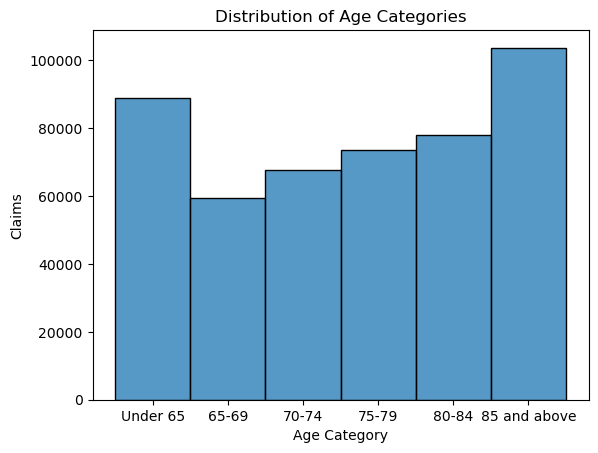

In [28]:
# Check the distribution of age categories (1 to 6)
print(data['age'].value_counts())


# Transform age categories
age_dict = {1: 'Under 65',
            2: '65-69',
            3: '70-74',
            4: '75-79',
            5: '80-84',
            6: '85 and above'}
data['age'] = data['age'].replace(age_dict)
data['age'] = pd.Categorical(data['age'], ['Under 65','65-69','70-74','75-79','80-84','85 and above'])

# Create a bar chart to display the distribution of age categories
sns.histplot(data['age'], kde=False)
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Claims')

# Display plot
plt.show()


### Inspect Gender Variable

Female    267676
Male      203755
Name: gender, dtype: int64
% Total of each gender: Men: 43.22 %, and Women: 56.78 %


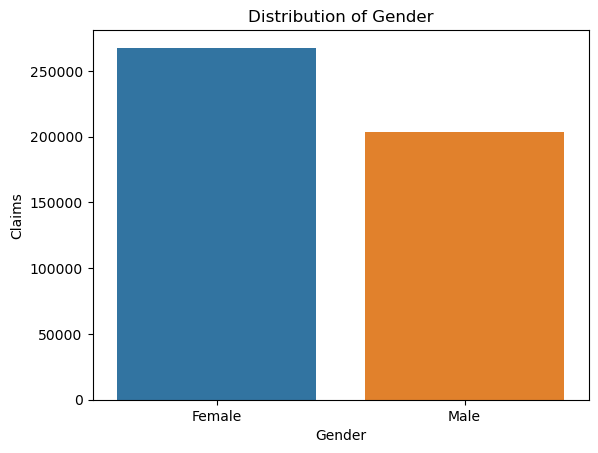

In [26]:
# Check for valid categories (male or female)
print(data['gender'].value_counts())

# Transform gender categories
gender_dict = {1: 'Male',
               2: 'Female'}
data['gender'] = data['gender'].replace(gender_dict)

# Gender breakdown
gender_counts = data['gender'].value_counts()
gender_percentages = gender_counts / len(data) * 100
print('% Total of each gender: Men:', round(gender_percentages['Male'], 2), 
      '%, and Women:', round(gender_percentages['Female'], 2), '%')

# Visualization: Create a bar chart to display the distribution of gender
sns.countplot(data=data, x='gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Claims')

# Display plot
plt.show()


### Inspect Base DRG variable

All Base DRG codes are in range


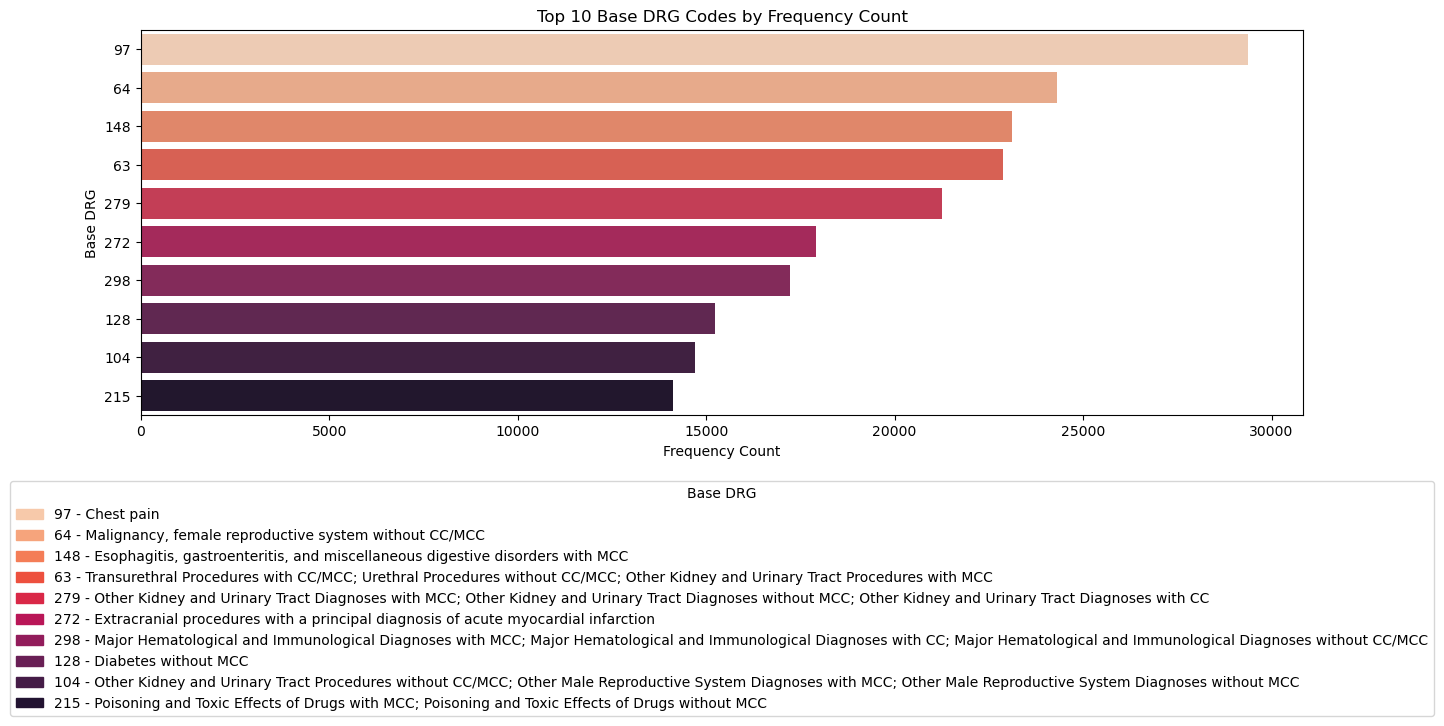

In [9]:
from matplotlib.patches import Rectangle

# Check for valid codes (1 to 311)
if data['base_drg'].min() == 1 and data['base_drg'].max() == 311:
    print('All Base DRG codes are in range')

# Get the top 10 Base DRG codes by frequency count
top10_base_drg = data['base_drg'].value_counts().head(10).sort_values(ascending=False)

# Subset the descriptor_base_drg column based on the index of top10_base_drg
descriptor_base_drg = data.loc[top10_base_drg.index, 'descriptor_drg']

# Define a color palette with more contrast
colors = sns.color_palette("rocket_r", len(top10_base_drg))

# Create a horizontal barplot of top 10 base_DRG codes and their frequencies
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x=top10_base_drg.values, y=top10_base_drg.index, ax=ax, orient='h', order=top10_base_drg.index, palette=colors)

# Chart Legend with descriptors
legend_labels = [f'{drg} - {desc}' for drg, desc in zip(top10_base_drg.index, descriptor_base_drg)]
legend_handles = [Rectangle((0,0),1,1, color=color) for color in colors]
ax.legend(legend_handles, legend_labels, title='Base DRG', loc='lower center', bbox_to_anchor=(.5, -0.8), ncol=1,
         fontsize = 10)

ax.set_title('Top 10 Base DRG Codes by Frequency Count')
ax.set_xlabel('Frequency Count')
ax.set_ylabel('Base DRG')

plt.show()


### Inspect ICD-9 primary procedure code variable

All ICD9 codes are in range


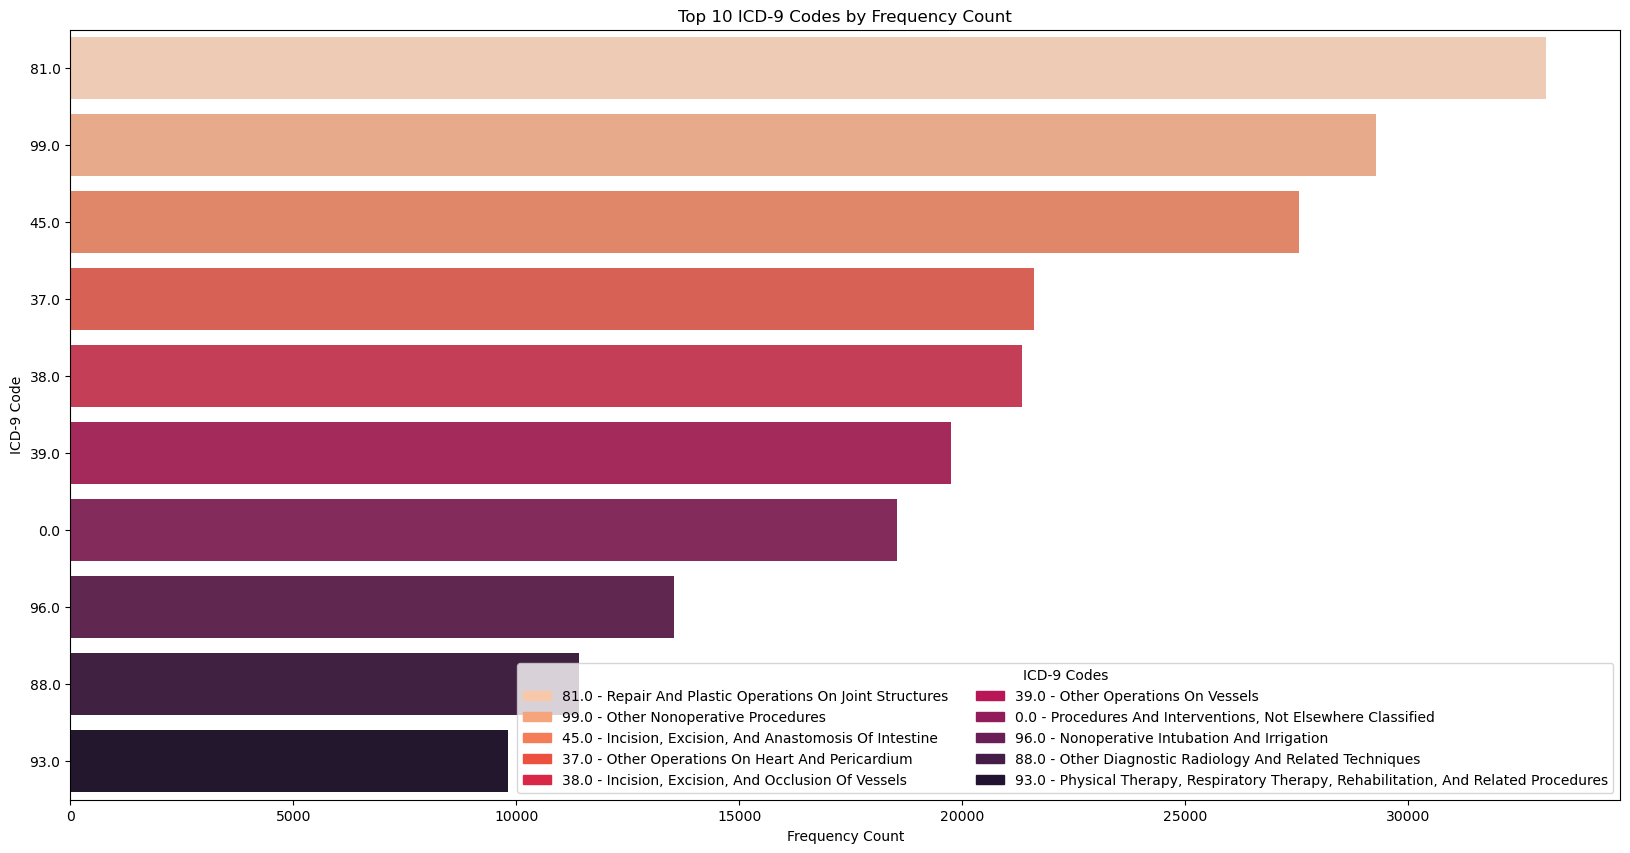

In [10]:
# Check for valid codes (0 to 99)
if data['icd9'].min() == 0 and data['icd9'].max() == 99:
    print('All ICD9 codes are in range')

# Filter out rows with missing ICD9 values
data_filtered = data.dropna(subset=['icd9'])

# Get the top 10 ICD9 codes by frequency count
top10_icd9 = data_filtered.groupby('icd9').size().nlargest(10).reset_index(name='valuecount')

# Subset the descriptor_icd9 column based on the index of top10_icd9
descriptor_icd9 = data_filtered.loc[data_filtered['icd9'].isin(top10_icd9['icd9']), ['icd9', 'descriptor_icd']].drop_duplicates()

# Merge the top10_icd9 and descriptor_icd9 DataFrames
top10_icd9_merged = top10_icd9.merge(descriptor_icd9, on='icd9')

# Sort the top10_icd9_merged DataFrame by 'valuecount' in descending order
top10_icd9_merged = top10_icd9_merged.sort_values('valuecount', ascending=False)

# Create a horizontal barplot of top 10 ICD9 codes and their frequencies
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='valuecount', y='icd9', data=top10_icd9_merged, ax=ax, orient='h', order=top10_icd9_merged['icd9'], palette=colors)

# Chart Legend with descriptors
legend_labels = [f"{row['icd9']} - {row['descriptor_icd']}" for _, row in top10_icd9_merged.iterrows()]
legend_handles = [Rectangle((0, 0), 1, 1, color=color) for color in colors]
ax.legend(legend_handles, legend_labels, title='ICD-9 Codes', loc='lower right', ncol=2)

ax.set_title('Top 10 ICD-9 Codes by Frequency Count')
ax.set_xlabel('Frequency Count')
ax.set_ylabel('ICD-9 Code')

plt.show()

### Inspect length of stay variable

2    261419
4    128898
3    122073
1     76025
Name: length, dtype: int64


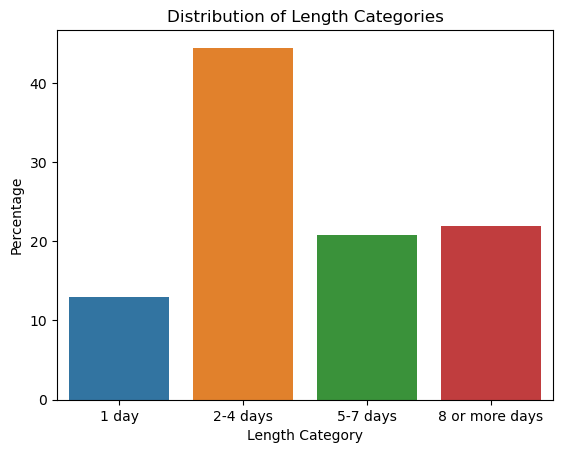

In [11]:
# Check the distribution of length categories (1 to 4)
print(data['length'].value_counts())

# Transform age categories
length_dict = {1: '1 day',
            2: '2-4 days',
            3: '5-7 days',
            4: '8 or more days'}
data['length'] = data['length'].replace(length_dict)
data['length'] = pd.Categorical(data['length'], ['1 day','2-4 days','5-7 days','8 or more days'])

# Calculate the percentage of observations in each length category
length_perc = (data['length'].value_counts(normalize=True) * 100).rename('percentage').reset_index()

# Create a bar chart to display the distribution of length categories
sns.barplot(x='index', y='percentage', data=length_perc)
plt.title('Distribution of Length Categories')
plt.xlabel('Length Category')
plt.ylabel('Percentage')

# Display plot
plt.show()

### Inspect claims amount variables

The data contains quintile values ranging from 1 to 5
count    471431.000000
mean       8176.114386
std        6775.662285
min        1184.000000
25%        4008.000000
50%        6055.000000
75%       10450.000000
max       84633.000000
Name: quint_avg_payment, dtype: float64


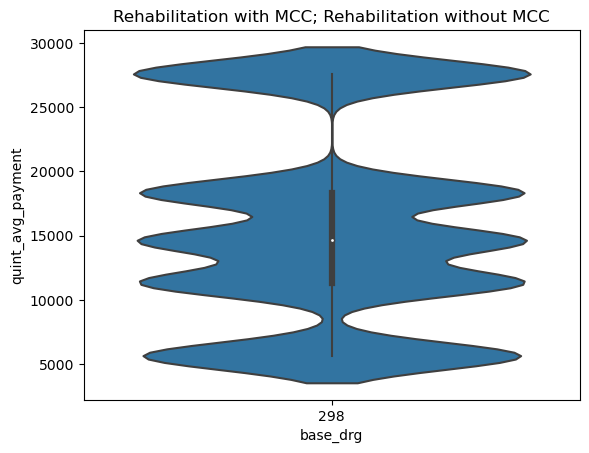

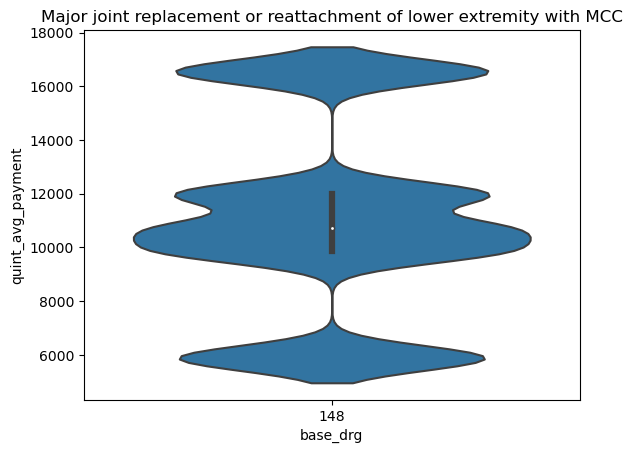

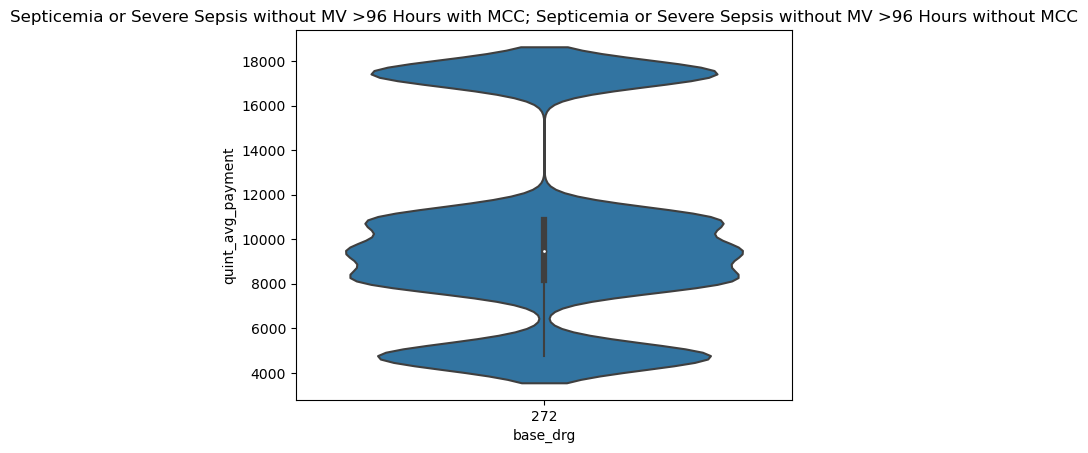

In [20]:
# Check for valid categories (1 to 5) for IP_DRG_QUINT_PMT_CD
if (data['quintile'].unique() >= 1).all() and (data['quintile'].unique() <= 5).all():
    print('The data contains quintile values ranging from 1 to 5')
    
#Check for valid values in IP_DRG_QUINT_PMT_AVG
print(data['quint_avg_payment'].describe())

# Group the data by base_drg and sum the quint_avg_payment for each group
drg_pay_sum = data.groupby('base_drg')['quint_avg_payment'].sum()

# Sort the drg_pay_sum series in descending order and get the top three DRGs
top_drgs = drg_pay_sum.sort_values(ascending=False).index[:3]

# Plot top 3 in drg_pay_sum
for drg in top_drgs:
    subset_drg = data[data['base_drg'] == drg]
    sns.violinplot(x='base_drg', y='quint_avg_payment', data=subset_drg)
    plt.title(data[data['base_drg'] == drg]['descriptor_drg'].iloc[0])
    plt.show()

## Data Filtering
Based on the dataset documentation, the rate of suppression of claims is much higher for DRGs that are uncommon among Medicare beneficiaries. To ensure that the statistical results derived from the dataset are reliable, we will focus on the 69 DRGs with 2,000 or more claims in the initial 5% sample. On average, less than 10% of claims from these DRGs have been suppressed. This reduces the number of observations by approximately 20%.

In [13]:
# Drop DRGs with less than 2000 claims
drg_counts = data['base_drg'].value_counts()
drg_filter = drg_counts[drg_counts >= 2000].index
data = data[data['base_drg'].isin(drg_filter)]

# Show filtered results
original_data = pd.read_csv(data_filepath)
print(f"Original data shape: {original_data.shape}")
print(f"Filtered data shape: {data.shape}")

Original data shape: (588415, 8)
Filtered data shape: (471431, 10)


# Exploratory Data Analysis

## Examine the distribution of healthcare expenditures across the selected DRGs.

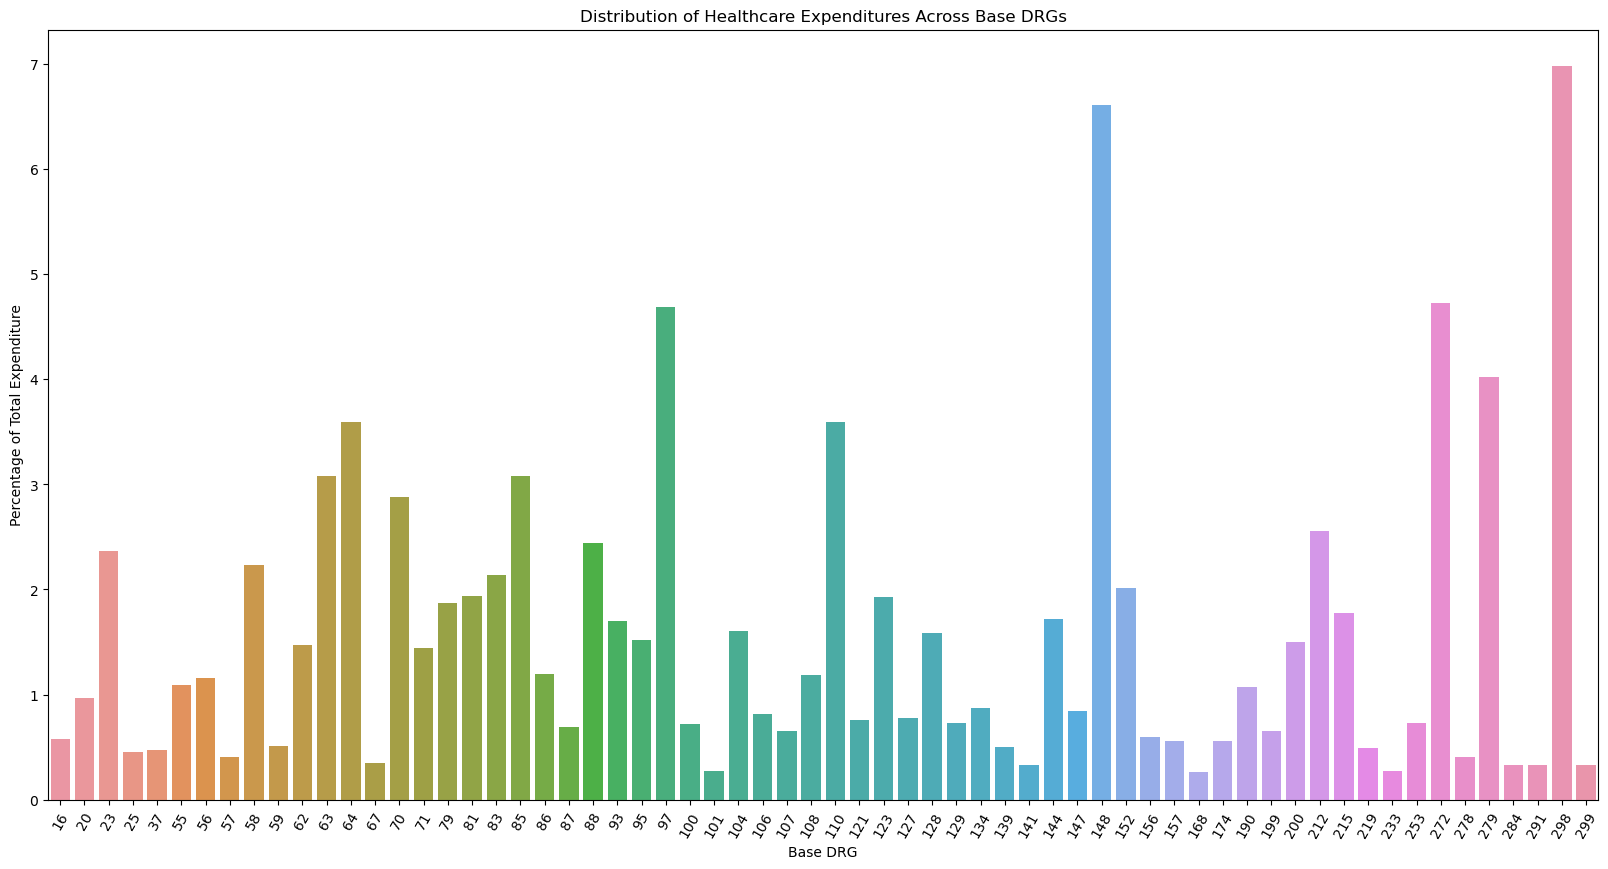

In [14]:
# Group the data by DRG code
grouped_data = data.groupby('base_drg')['quint_avg_payment'].sum()

# Calculate the percentage of total expenditure for each DRG
total_expenditure = grouped_data.sum()
percentage_expenditure = (grouped_data / total_expenditure) * 100

# Reset the index of the percentage_expenditure DataFrame
percentage_expenditure = percentage_expenditure.reset_index()

# Visualize the distribution as horizontal bar chart
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=percentage_expenditure, x='base_drg', y='quint_avg_payment', ax=ax)
plt.title('Distribution of Healthcare Expenditures Across Base DRGs')
plt.xlabel('Base DRG')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.ylabel('Percentage of Total Expenditure')
plt.show()

## Analyze the distribution of expenditures by demographic factors (e.g., age, gender, and region).

    Analyze the distribution of expenditures by demographic factors
    a. Examine the distribution of expenditures by age group
    i. Create boxplots of payment amounts for each age group
    ii. Calculate summary statistics for each age group
    b. Examine the distribution of expenditures by gender
    i. Create boxplots of payment amounts for each gender
    ii. Calculate summary statistics for each gender
    c. Examine the distribution of expenditures by region (if applicable)
    i. Create boxplots of payment amounts for each region
    ii. Calculate summary statistics for each region

### Distribution of expeditures by age and gender
    Whats interesting?  More expenditures go toward women.  Of all payments - Largest share of payments go to > 85 group, though their average payment per code is lower.

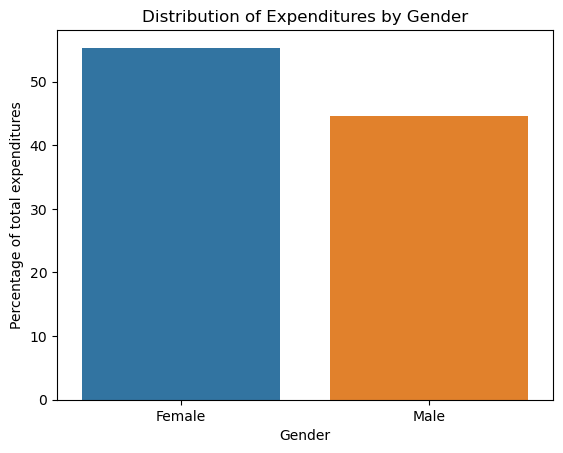

In [19]:
#calculate the total expenditures for each gender
gender_pay_sum = data.groupby('gender')['quint_avg_payment'].sum()

# Calculate the percentage of total expenditures for each age group
gender_pay_pct = gender_pay_sum / gender_pay_sum.sum() * 100

# Plot the percentage of total expenditures for each gender using a bar plot
sns.barplot(x=gender_pay_pct.index, y=gender_pay_pct)
plt.xlabel('Gender')
plt.ylabel('Percentage of total expenditures')
plt.title('Distribution of Expenditures by Gender')
plt.show()


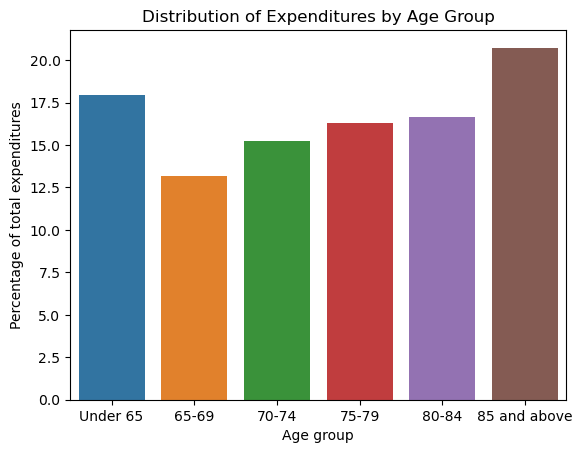

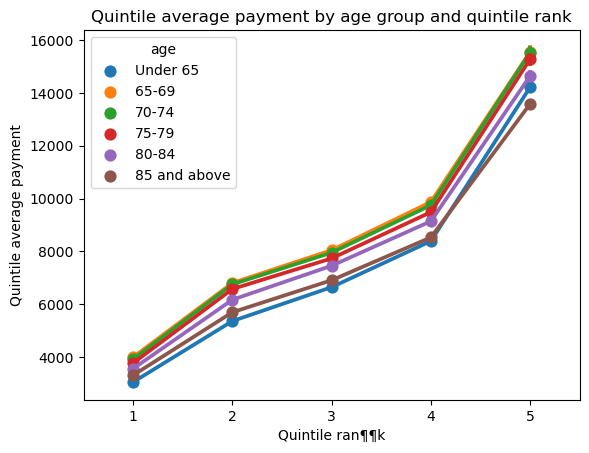

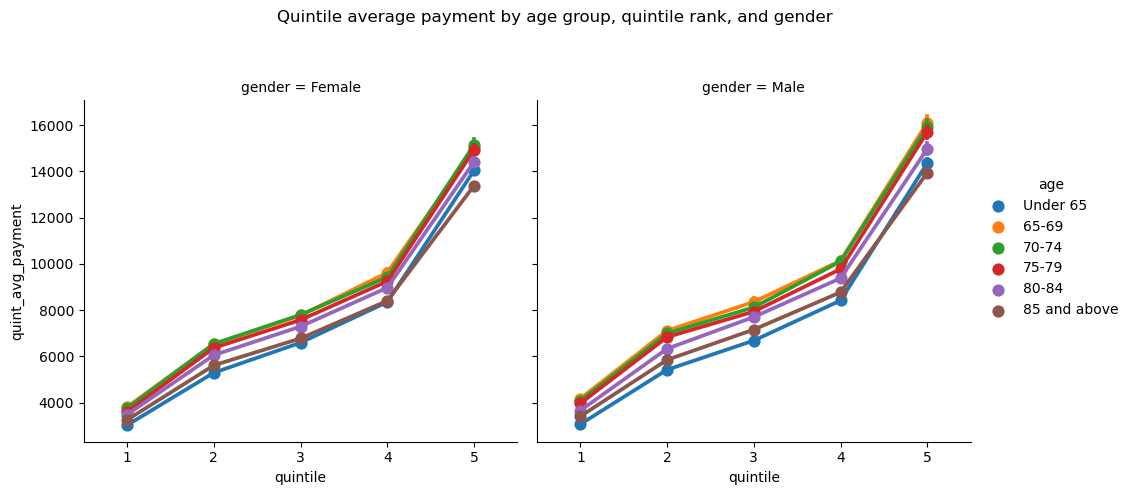

In [22]:
# Calculate the total expenditures for each age group
age_pay_sum = data.groupby('age')['quint_avg_payment'].sum()

# Calculate the percentage of total expenditures for each age group
age_pay_pct = age_pay_sum / age_pay_sum.sum() * 100

# Plot the percentage of total expenditures for each age group using a bar plot
sns.barplot(x=age_pay_pct.index, y=age_pay_pct)
plt.xlabel('Age group')
plt.ylabel('Percentage of total expenditures')
plt.title('Distribution of Expenditures by Age Group')
plt.show()

# Create a new column that indicates the quintile range for each observation
data['quintile_range'] = pd.cut(data['quintile'], bins=[1,2,3,4,5,6], 
                                labels=['1-20%', '21-40%', '41-60%', '61-80%', '81-100%'])

# Create a point plot to show the quintile average payments by age group and quintile rank
sns.pointplot(x='quintile', y='quint_avg_payment', hue='age', data=data)
plt.xlabel('Quintile rank')
plt.ylabel('Quintile average payment')
plt.title('Quintile average payment by age group and quintile rank')


sns.catplot(x='quintile', y='quint_avg_payment', hue='age', col='gender', data=data, kind='point')
plt.subplots_adjust(top=0.8)
plt.suptitle('Quintile average payment by age group, quintile rank, and gender')
plt.show()

# Show the chart
plt.show()


## Investigate the relationship between expenditures and length of stay.
    Findings: The majority of claims are either in the 2-4 day range, or in the > 8 day range.  Claims costs increase as the length of stay increases, no surprise.  There appears to be no meaningful difference across genders.

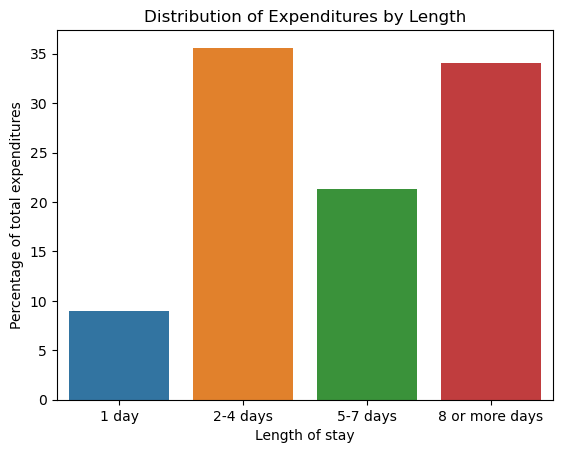

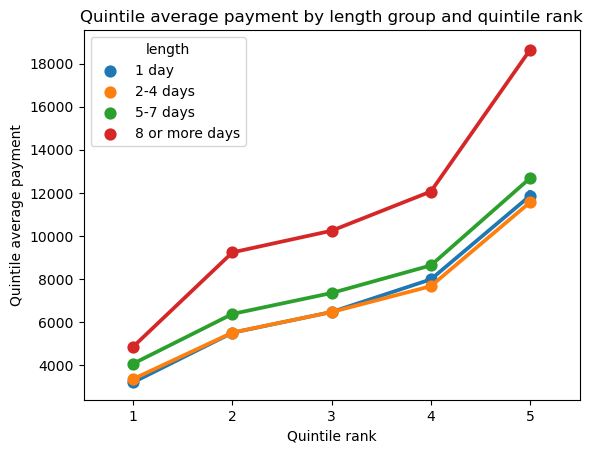

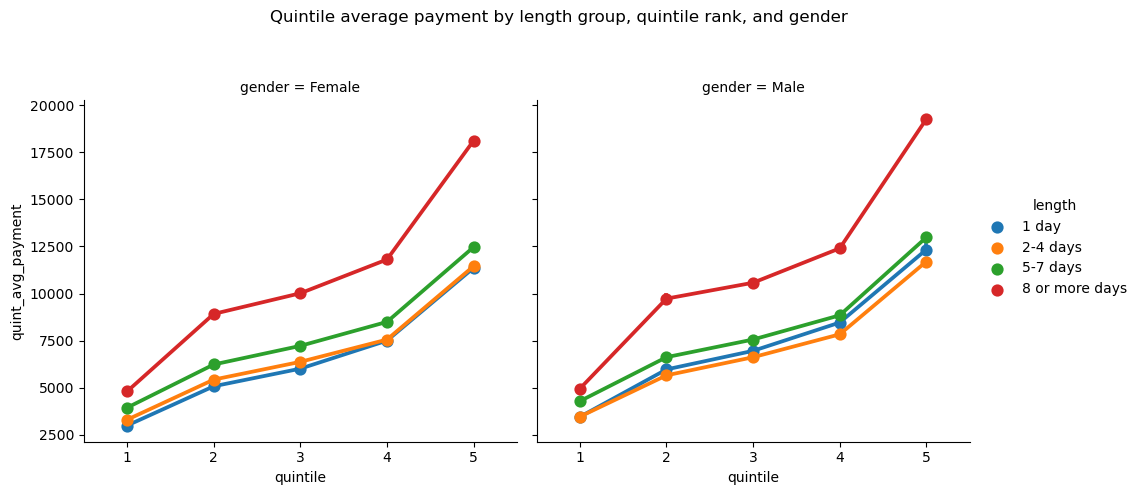

In [29]:
# Calculate the total expenditures by length of stay
length_pay_sum = data.groupby('length')['quint_avg_payment'].sum()

# Calculate the percentage of total expenditures for each age group
length_pay_pct = length_pay_sum / length_pay_sum.sum() * 100

# Plot the percentage of total expenditures for each age group using a bar plot
sns.barplot(x=length_pay_pct.index, y=length_pay_pct)
plt.xlabel('Length of stay')
plt.ylabel('Percentage of total expenditures')
plt.title('Distribution of Expenditures by Length')
plt.show()

# Create a new column that indicates the quintile range for each observation
data['quintile_range'] = pd.cut(data['quintile'], bins=[1,2,3,4,5,6], 
                                labels=['1-20%', '21-40%', '41-60%', '61-80%', '81-100%'])

# Create a point plot to show the quintile average payments by age group and quintile rank
sns.pointplot(x='quintile', y='quint_avg_payment', hue='length', data=data)
plt.xlabel('Quintile rank')
plt.ylabel('Quintile average payment')
plt.title('Quintile average payment by length group and quintile rank')


sns.catplot(x='quintile', y='quint_avg_payment', hue='length', col='gender', data=data, kind='point')
plt.subplots_adjust(top=0.8)
plt.suptitle('Quintile average payment by length group, quintile rank, and gender')
plt.show()

# Show the chart
plt.show()

 Investigate the relationship between healthcare expenditures and other relevant variables
    b. Examine the relationship between expenditures and specific procedures (e.g., ICD-9 primary procedure codes)
    i. Create boxplots of payment amounts for the top procedures
    ii. Calculate summary statistics for each procedure

### Expenditures for specific procedures

## Create summary statistics and visualizations to better understand the dataset and identify patterns, trends, or anomalies.

In [ ]:
Create summary statistics and visualizations to better understand the dataset and identify patterns, trends, or anomalies
    a. Develop a summary table of key statistics for the entire dataset
    b. Create visualizations to highlight trends or patterns in the data
    i. Time series plots (if applicable)
    ii. Heatmaps (if applicable)
    c. Identify and discuss any notable anomalies or outliers observed in the data

# Data Visualization

## Create visualizations for healthcare expenditures by demographics (e.g., bar charts, box plots, violin plots).

## Develop visualizations for healthcare expenditures by DRG (e.g., bar charts, heatmap).

## Generate visualizations illustrating the relationship between healthcare expenditures and other relevant variables (e.g., scatter plots, pair plots).

## Utilize visualization best practices to ensure clarity and effectiveness (e.g., appropriate chart types, color schemes, labels, and legends).

# Insights and Findings

## Summarize key insights and findings from the exploratory data analysis and visualizations.

## Discuss potential factors driving the observed patterns, trends, or anomalies.

## Address any limitations of the dataset or analysis that could impact the interpretation of the findings.

# Conclusion

## Recap the project's goal and main findings.

## Discuss the potential implications of the findings for healthcare providers, insurers, or policymakers.

## Suggest possible next steps or future projects that could build upon the current analysis.

# Appendix (optional)

## Include additional charts, tables, or detailed explanations that support the main findings but may not be essential to include in the main report.